<h1><center>MINI PROJECT</center></h1>

# <center> Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.This will also help in generating more revenue.

# <center> Hypothesis Generation

## Hypothesis Generation Based On Various Factors

Some of the hypothesis are as follows:


### i) Product based features

<li><b>Item:</b>Sales can fluctuate according to the item type such as people in a specific area prefer to buy grocery     items instead of electronics.</li>
    <li><b>Brand:</b>Branded items should be more popular in customers because of promotional influence.</li>
    <li><b>Quality:</b>Sale rate should be high of the products having good quality.</li>
    <li><b>Cost:</b>Cheaper price products having good quality could attract more customers to the products.</li>
    <li><b>Availability:</b>Availability of products tend to gain customers' trust and sustain their ease level.</li>
    <li><b>Advertising:</b>Best advertisement approaches leads to more product sales.</li>
    <li><b>Packaging:</b>Physical appearance/packaging of product seeks more customers' attention and thus have impact on greater sales.</li>
    <li><b>Promotional Offers:</b>Promotional offer is a key point in sales success. Customers are easily attracted to new products.</li>
    

### ii) Customer based features

<li><b>Family Size:</b>Customer having more members in the family is more likely to buy more items.</li>
    <li><b>Financial Status:</b>People having strong financial profile do shopping lavishly.</li>
    <li><b>Purchasing History:</b>Most of the time, customer purchasing style is reflected through his past shopping history i.e. the items he frequently purchase.</li>
    <li><b>Age:</b>Children prefer items like toys and adults can opt for grocesary</li>
    <li><b>Gender:</b>Females like beauty products as compared to men.</li>
    <li><b>Behavior:</b>Behavior of customers towards purchasing also matters, some prefer brand over cost.</li>
    

### iii) Store based features

<li><b>Location:</b>There will be more customers in store present in populated area.</li>
    <li><b>Store Capacity:</b>Greater the store capacity, more the items can be placed to entertain the need of people.</li>
    <li><b>Marketing:</b>Good marketing of some stores leads to more buyers.</li>
    <li><b>Competitors:</b>Stability of the store is highly dependent on it's proper functioning i.e. provides best services to the customers as compared to competitors</li>
    

### iv) Environment/Locality based features

<li><b>Population:</b>Store present in populated area has more customers.</li>
    <li><b>Status of people:</b>Elite class community head towards shopping more frequently as compared to middle and poor class group .</li>
    <li><b>Age factor:</b>Locality with more youth ratio can prefer fast food items, beauty products.</li>
    <li><b>Gender:</b>Area with more female ratio can have higher beauty products purchase.</li>
    <li><b>Culture:</b>People with simple cultural norms usually don't use branded and beauty items which leads to less sale.</li>
    <li><b>Weather:</b>In cold weather regions, dry food items should be sold at higher rate.</li>
        
        

# <center> Loading Packages and Data

### i) Data Intro

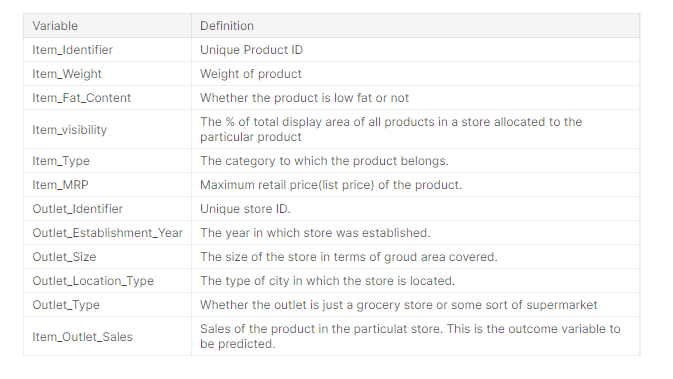

### ii) Importing libraries & load data

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train_data= pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

In [256]:
train_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# <center> Data Structure & Content

In [257]:
#sort_year = train_data.sort_values(['Outlet_Establishment_Year'], ascending=[True])
#sort_year.head(5)

### i) Dimensions of data

In [258]:
print("**************Training data****************")
print("No of rows: " , train_data.shape[0])
print("No of columns: " , train_data.shape[1])
print("Columns names: ", train_data.columns)
print("**************Testing data*****************")
print("No of rows: " , test_data.shape[0])
print("No of columns: " , test_data.shape[1])
print("Columns names: ", test_data.columns)

**************Training data****************
No of rows:  8523
No of columns:  12
Columns names:  Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
**************Testing data*****************
No of rows:  5681
No of columns:  11
Columns names:  Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


<b>Observations</b>
<li>There are 8523 instances present in training data with 12 attributes. Item_Outlet_Sales is output variable.</li>
<li>There are 5681 instances present in testing data with 11 attributes. Item_Outlet_Sales is output variable which is not present and we have to predict. </li>
<li>All the features are available in the dataset.</li>



### ii) Features info

In [259]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<b>Numerical Attributes</b>
<li>Item_Weight</li>
<li>Item_Visibility </li>
<li>Item_MRP</li>
<li>Outlet_Establishment_Year</li>
<li>Item_Outlet_Sales </li>

   

<b>Categorical Attributes</b>
<li>Item_Identifier</li>
<li>Item_Fat_Content </li>
<li>Item_Type</li>
<li>Outlet_Identifier</li>
<li>Outlet_Size  </li>
<li> Outlet_Location_Type</li>
<li>Outlet_Type</li>


<b>Observations</b>
<li>There are three types of features; 4 float, 1 int and 7 object type.</li>
<li>Item_fat_Content, Outlet_Size, Outlet_Location_Type and Outlet_Type are ordinal variables that can be arranged in order </li>


# <center> Univariate Analysis

### i) Numerical Features

In [260]:
num_features = train_data.select_dtypes(include=['int64', 'float64']).dtypes.index
print("No of numerical Features: ", len(num_features))
print(num_features)






No of numerical Features:  5
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


In [261]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<b>Observations</b>
<li>Count shows that there are missing values of Item_Weight because total number of training instances are 8523.</li>
<li>Average figure of Item_Weight 12kg and maximum of 21 kg shows that stores do no sell heavy weight items. </li>
<li>Average figure of Item_MRP 140 and maximum of 266 shows that stores do no sell expensive items like laptops, mobiles,AC etc </li>
<li>Oldest stores were established in 1985 and modern ones came into existence in 2009.</li>
<li>Average sales of items  are of Rs. 2,181 and maximum Rs. 13,086 </li>

In [262]:
num_features = num_features.tolist()
#print(type(num_features))
#print(num_features)

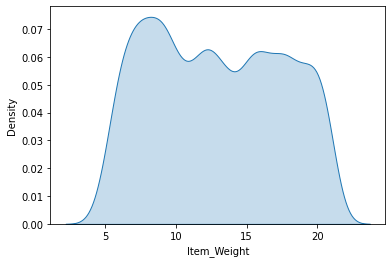

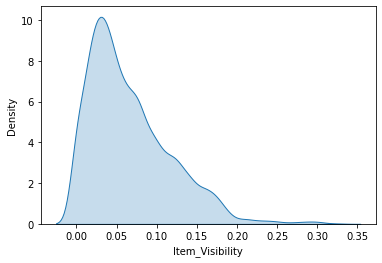

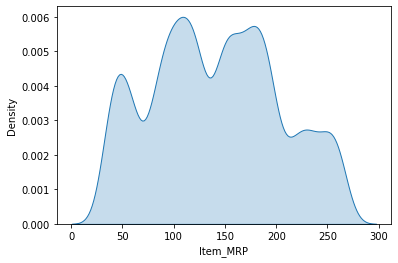

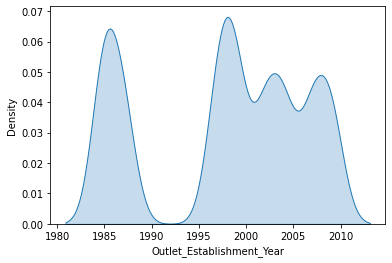

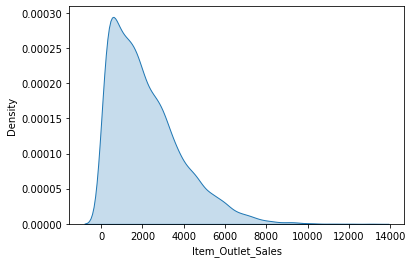

In [263]:
i=0
while(i<len(num_features)):
    sns.kdeplot(train_data[num_features[i]], shade=True)
    plt.show()
    i=i+1

<b>Observations</b>
<li>Weight of the items are in range of 4-22kg and average weight is 12kg.</li>
<li>Visibility of items is only 33% as there are some items which are not visible at all. </li>
<li>Maximum retail price of the items are less than Rs. 300 which indicates that stores do not sell expensive items like electronics etc.</li>
<li>Stores were established between 1985 to 2010 but due to some poor financial circumstances of the community no store was established between 1990 to 1995.</li>
<li>Only few stores have maximum sales above Rs. 6000. Otherwise the sales at maximum stores are upto Rs. 4000.</li>

### ii) Categorical Features

In [264]:
cat_features = train_data.select_dtypes(include=['object']).dtypes.index
print("No of categorical Features: ", len(cat_features))
print(cat_features)



No of categorical Features:  7
Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [265]:
cat_features = cat_features.tolist()

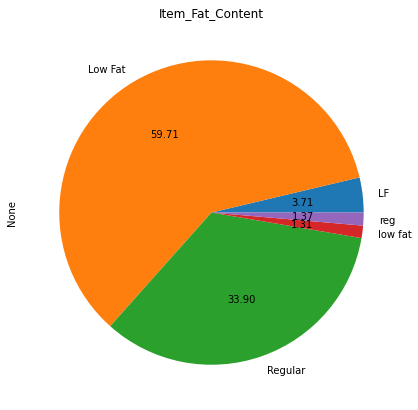

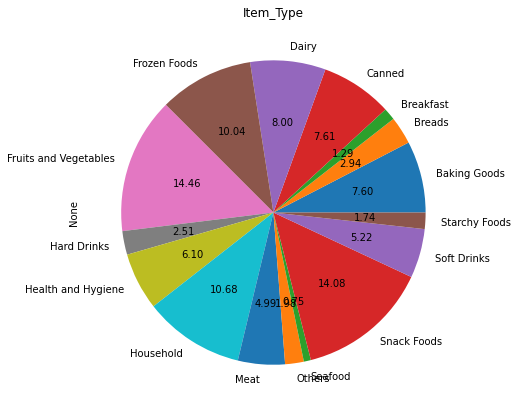

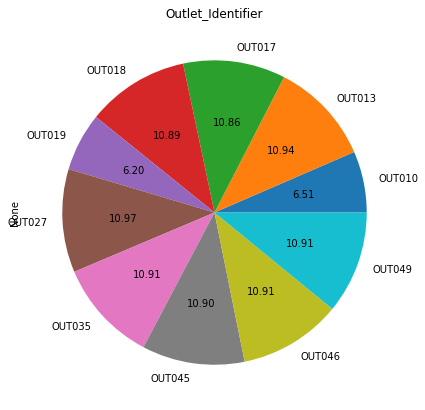

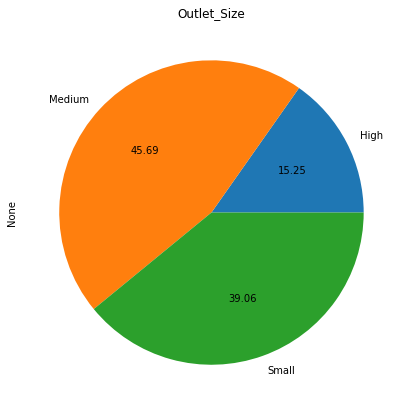

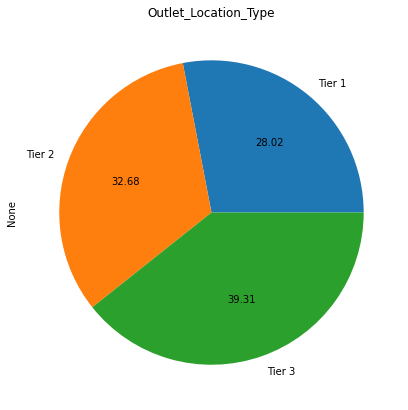

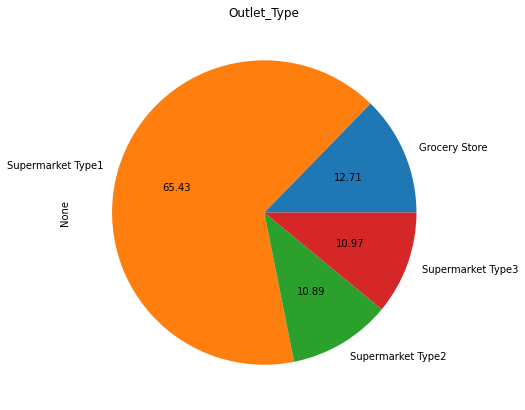

In [266]:
i=1
while(i<len(cat_features)):
    plt.figure(figsize=(7, 7))
    train_data.groupby(train_data[cat_features[i]]).size().plot(kind='pie',autopct='%.2f')
    plt.title(cat_features[i])
    plt.show()
    i=i+1
    

<b>Observations</b>
<li>Around 65% of the items contain low fat. Moreover, "low fat, LF, Low Fat" indicates same category so we have to convert into one later on.</li>
<li>Most of the sales are of food type such as fruits & vegetables, snacks food, frozen food and househol things. Breakfast and sea food ratio is very less.</li>
<li>There are 10 stores in total. All the stores are selling almost same number of items except OUTO10 and OUTO19.</li>
<li>47% of the outlet size fall in medium, 40% in samll and 15% in high category. It indicates, mostly the items are purchased from medium outlets.</li>
<li>39% of the items are sold from the stores located in Tier 3 cities, while 32% and 28% items are sold from stores located in Tier 2 and Tier 1 cities respectively.</li>
<li>Most of the customers prefer to buy items from Supermarket Type 1</li>




# <center>  Bivariate Analysis

### i) Numerical-Numerical Features

In [267]:
num_features = train_data.select_dtypes(include=['int64', 'float64'])
num_features.corr(method = 'pearson')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [268]:
num_features.corr(method = 'spearman')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014879,0.030822,-0.009393,0.015062
Item_Visibility,-0.014879,1.000000,0.005688,-0.054924,-0.115076
Item_MRP,0.030822,0.005688,1.000000,0.003782,0.562986
Outlet_Establishment_Year,-0.009393,-0.054924,0.003782,1.000000,0.042947
Item_Outlet_Sales,0.015062,-0.115076,0.562986,0.042947,1.000000


<AxesSubplot:>

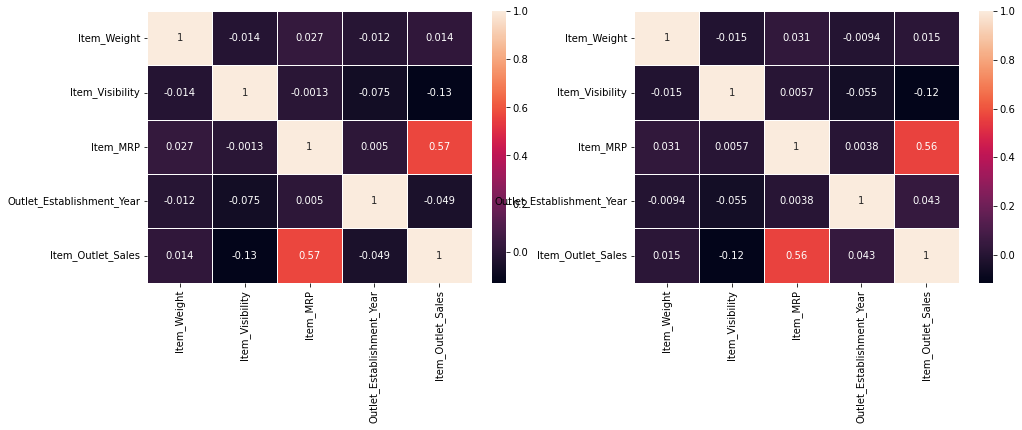

In [269]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.heatmap(num_features.corr(method = 'pearson'),cbar=True,annot=True,linewidths=1)
plt.subplot(1,2,2)
sns.heatmap(num_features.corr(method = 'spearman'),cbar=True,annot=True,linewidths=1)



In [ ]:
#sns.pairplot(num_features)

<b>Observations</b>
<li>Weight of the item has direct relation with it's retail price.</li>
<li>Item visibity decrease the outlet sales of items as it has negative correlation.</li>



### ii) Numerical-Categorical Features

In [271]:
cat_features = train_data.select_dtypes(include='object')
cat_features.dtypes.index


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [272]:
def Bivariate_cont_cat(data, cont, cat, p_value, f_value, sign_level):
    if p_value < sign_level and f_value > 1:
        sign = True
    else:
        sign = False
    table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc=np.mean)
    plt.figure(figsize=(20,5),dpi=120)
    plt.subplot(1,3,1)
    sns.barplot(x=cat,y=cont,data=data, hue=cat)
    plt.title('anova-test P value = {} \n anova-test F value = {} \n Significant diff = {} \n{}'.format(p_value,f_value,sign,table))
    if len(data[cat].value_counts()) > 7:
        X=plt.gca().xaxis
        for item in X.get_ticklabels():
            item.set_rotation(90)
    plt.subplot(1,3,2)
    sns.kdeplot(x = cont, hue = cat, data = data,shade = True)
    plt.title('Category Distribution', fontsize = 14, fontweight = 'bold')
    if len(data[cat].value_counts()) > 7:
        X=plt.gca().xaxis
        for item in X.get_ticklabels():
            item.set_rotation(90)
    
            

### Item fat content vs Sales

In [273]:
from scipy import stats
df_anova = train_data[['Item_Outlet_Sales','Item_Fat_Content']]
grouped_anova = df_anova.groupby(['Item_Fat_Content'])
grouped_anova.head()
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Low Fat')['Item_Outlet_Sales'],grouped_anova.get_group('Regular')['Item_Outlet_Sales'],
                               grouped_anova.get_group('low fat')['Item_Outlet_Sales'], grouped_anova.get_group('LF')['Item_Outlet_Sales'],
                               grouped_anova.get_group('reg')['Item_Outlet_Sales'])
print(f_value, p_value)

1.7257091657385915 0.14122147854932424


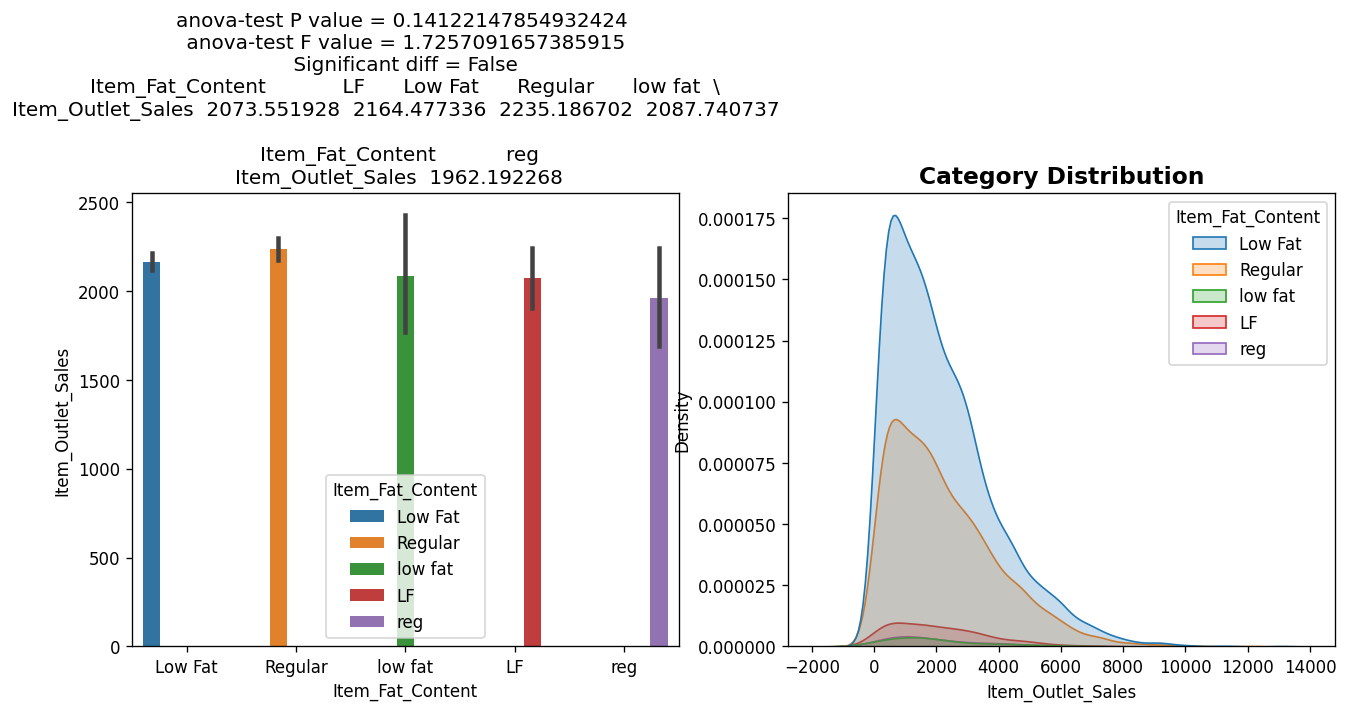

In [274]:
Bivariate_cont_cat(train_data,'Item_Outlet_Sales','Item_Fat_Content',p_value,f_value, 0.01)

### Item type vs Sales

In [275]:
train_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [276]:
df_anova = train_data[['Item_Outlet_Sales','Item_Type']]
grouped_anova = df_anova.groupby(['Item_Type'])
grouped_anova.head()
from scipy import stats
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Dairy')['Item_Outlet_Sales'],grouped_anova.get_group('Soft Drinks')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Meat')['Item_Outlet_Sales'], grouped_anova.get_group('Fruits and Vegetables')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Baking Goods')['Item_Outlet_Sales'],grouped_anova.get_group('Frozen Foods')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Breakfast')['Item_Outlet_Sales'], grouped_anova.get_group('Health and Hygiene')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Hard Drinks')['Item_Outlet_Sales'], grouped_anova.get_group('Canned')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Breads')['Item_Outlet_Sales'],grouped_anova.get_group('Starchy Foods')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Others')['Item_Outlet_Sales'],grouped_anova.get_group('Seafood')['Item_Outlet_Sales'])
print(f_value, p_value)

2.531322277281526 0.0017939203039080088


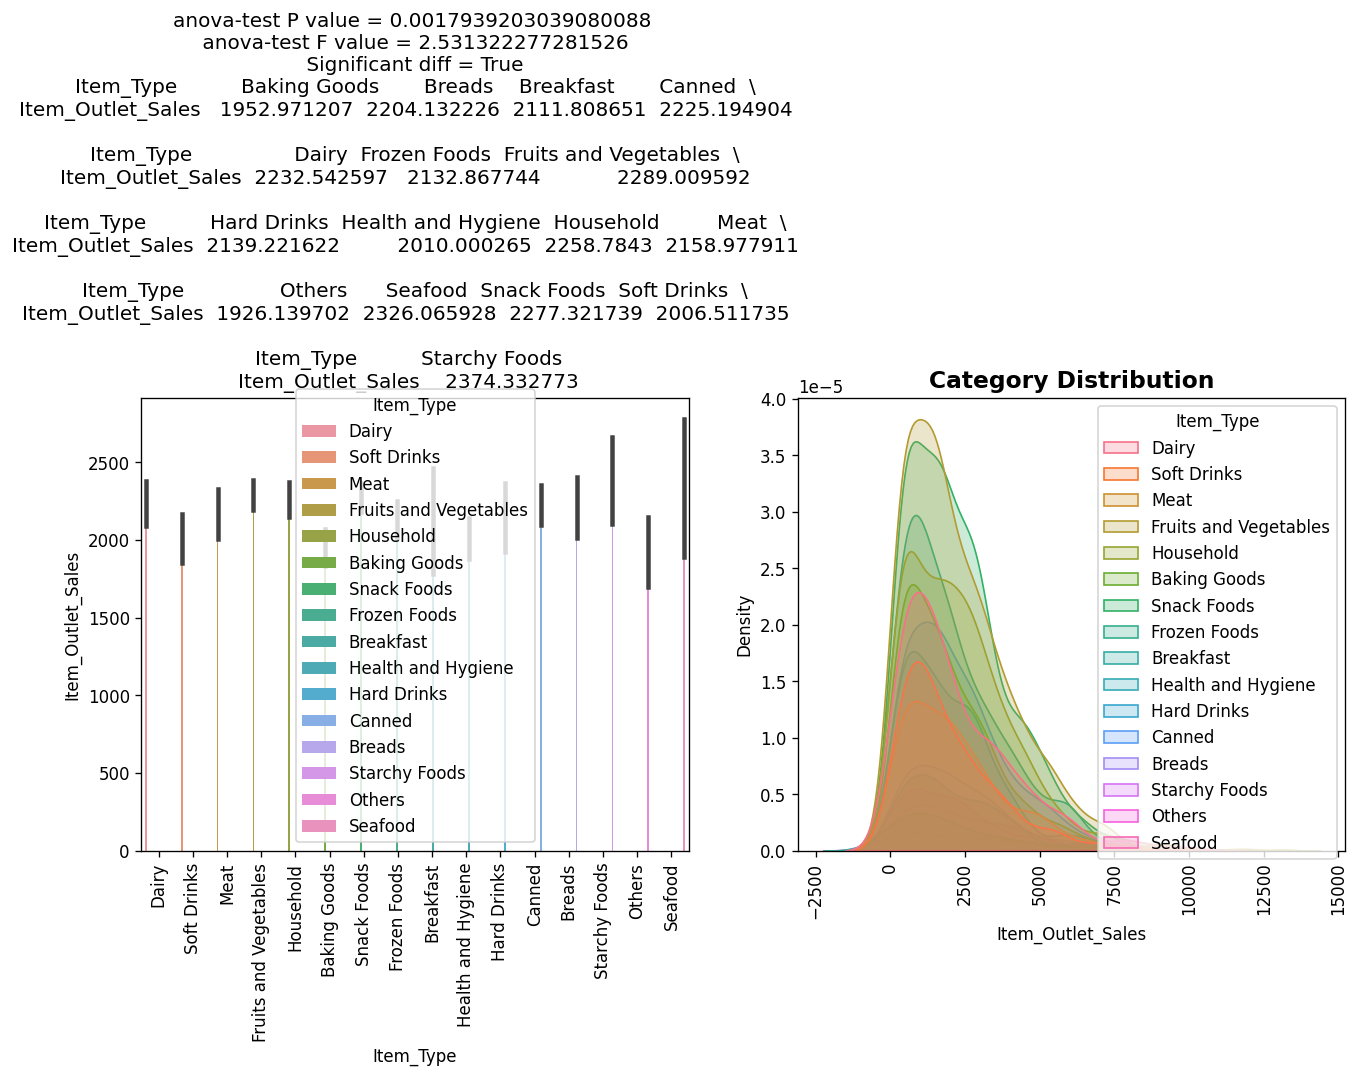

In [277]:
Bivariate_cont_cat(train_data, 'Item_Outlet_Sales','Item_Type',p_value, f_value, 0.05)

### Store Size vs Sales

In [278]:
train_data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [279]:
df_anova = train_data[['Item_Outlet_Sales','Outlet_Size']]
grouped_anova = df_anova.groupby(['Outlet_Size'])
from scipy import stats
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Medium')['Item_Outlet_Sales'],grouped_anova.get_group('High')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Small')['Item_Outlet_Sales'])
print(f_value,p_value)

131.09669439861293 1.7912745521017898e-56


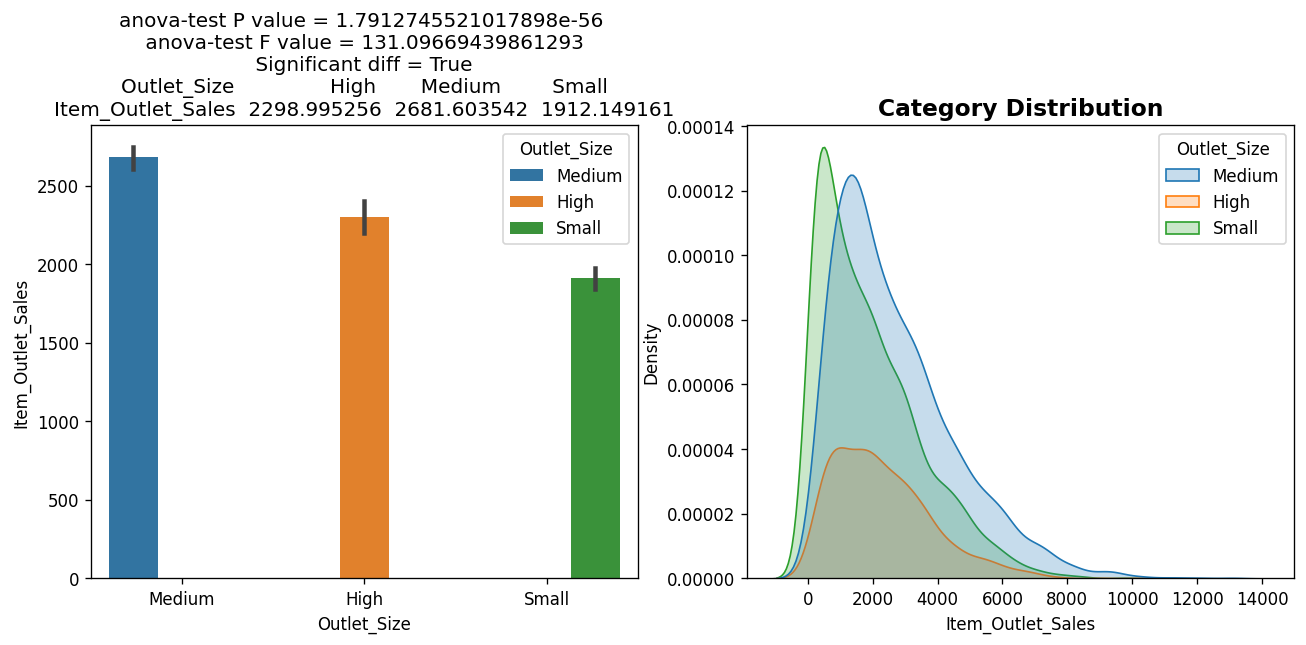

In [280]:
Bivariate_cont_cat(train_data,'Item_Outlet_Sales','Outlet_Size',p_value, f_value, sign_level = 0.05)

### Store location in cities vs Sales

In [281]:
train_data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [282]:
df_anova = train_data[['Item_Outlet_Sales','Outlet_Location_Type']]
grouped_anova = df_anova.groupby('Outlet_Location_Type')
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Tier 1')['Item_Outlet_Sales'],grouped_anova.get_group('Tier 2')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Tier 3')['Item_Outlet_Sales'])
print(f_value,p_value)

53.947739874560675 5.2228172988842975e-24


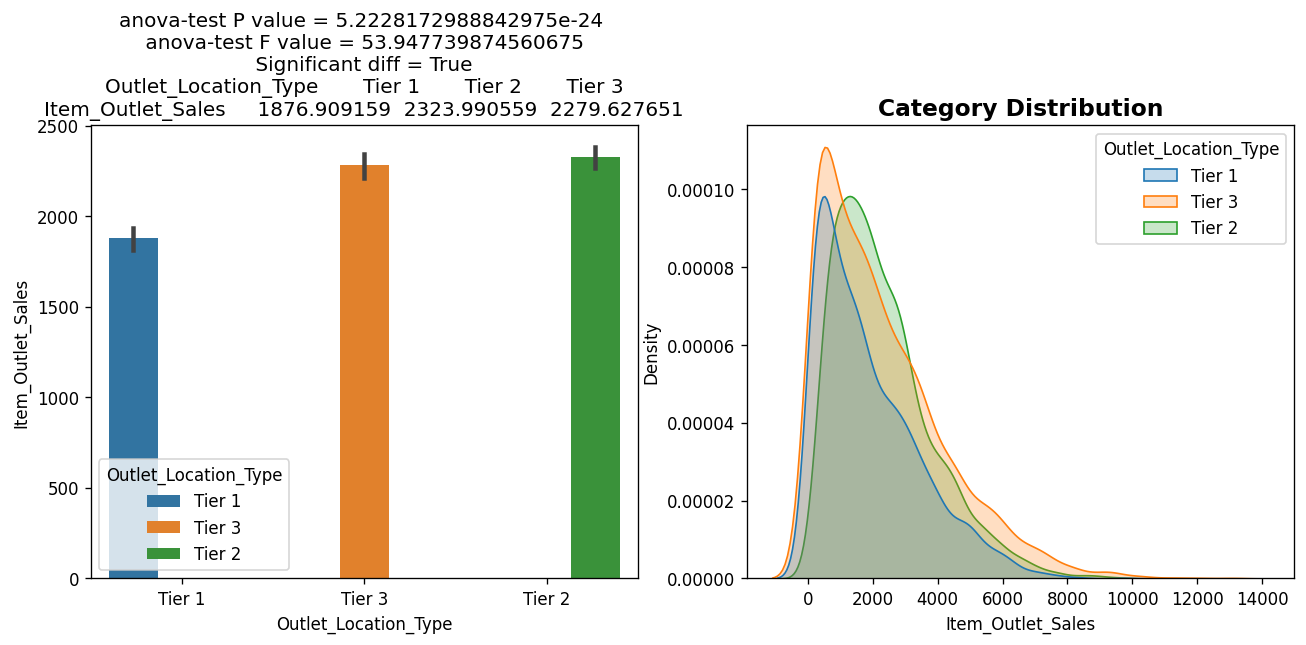

In [283]:
Bivariate_cont_cat(train_data,'Item_Outlet_Sales','Outlet_Location_Type', p_value, f_value, sign_level = 0.05)

### Supermarket Type Vs Sales

In [284]:
train_data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [285]:
df_anova = train_data[['Item_Outlet_Sales','Outlet_Type']]
grouped_anova = df_anova.groupby('Outlet_Type')
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Supermarket Type1')['Item_Outlet_Sales'],grouped_anova.get_group('Supermarket Type2')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Supermarket Type3')['Item_Outlet_Sales'])
print(f_value,p_value)

343.9181990337556 1.402711127727785e-143


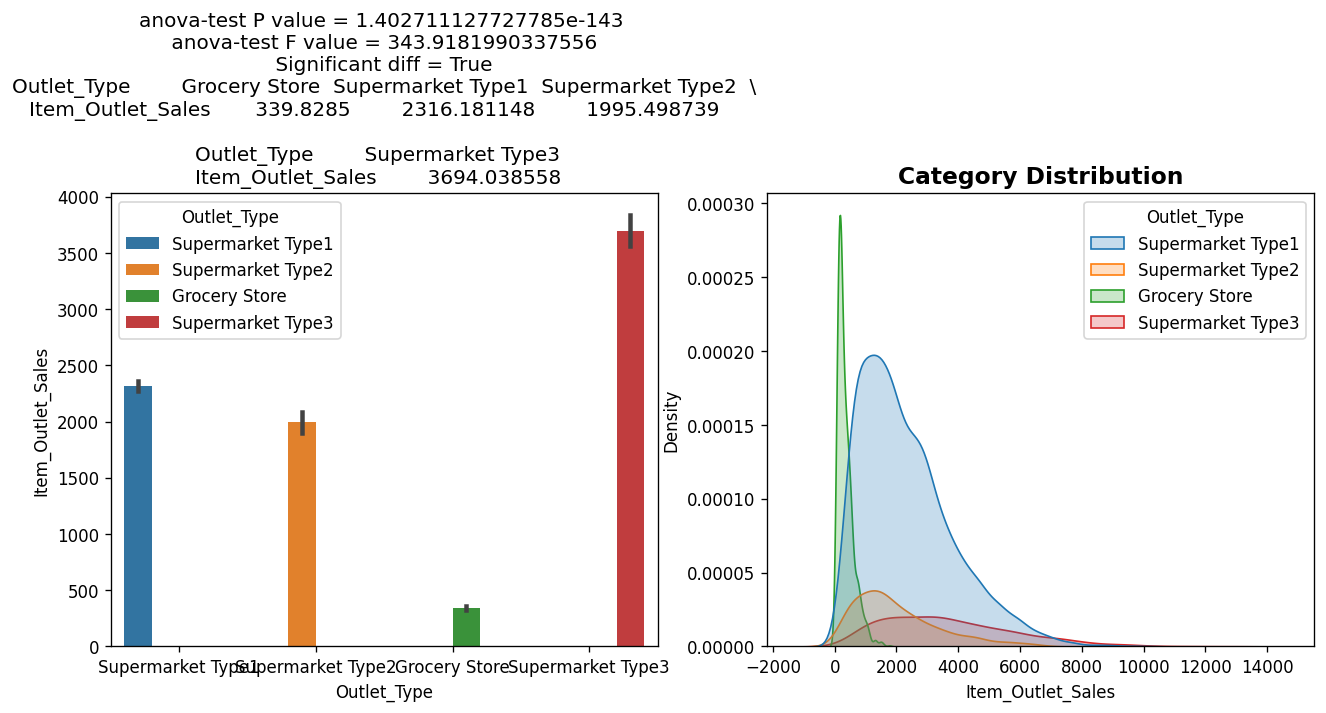

In [286]:
Bivariate_cont_cat(train_data,'Item_Outlet_Sales','Outlet_Type', p_value,f_value, sign_level=0.05)

### Store vs Sales

In [287]:
train_data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [288]:
df_anova = train_data[['Item_Outlet_Sales','Outlet_Identifier']]
grouped_anova = df_anova.groupby('Outlet_Identifier')
f_value, p_value = stats.f_oneway(grouped_anova.get_group('OUT049')['Item_Outlet_Sales'],grouped_anova.get_group('OUT018')['Item_Outlet_Sales'],
                               grouped_anova.get_group('OUT010')['Item_Outlet_Sales'],grouped_anova.get_group('OUT013')['Item_Outlet_Sales'],
                               grouped_anova.get_group('OUT027')['Item_Outlet_Sales'],grouped_anova.get_group('OUT045')['Item_Outlet_Sales'],
                               grouped_anova.get_group('OUT017')['Item_Outlet_Sales'],grouped_anova.get_group('OUT046')['Item_Outlet_Sales'],
                               grouped_anova.get_group('OUT019')['Item_Outlet_Sales'],grouped_anova.get_group('OUT035')['Item_Outlet_Sales'])
print(f_value,p_value)

300.07913532849034 0.0


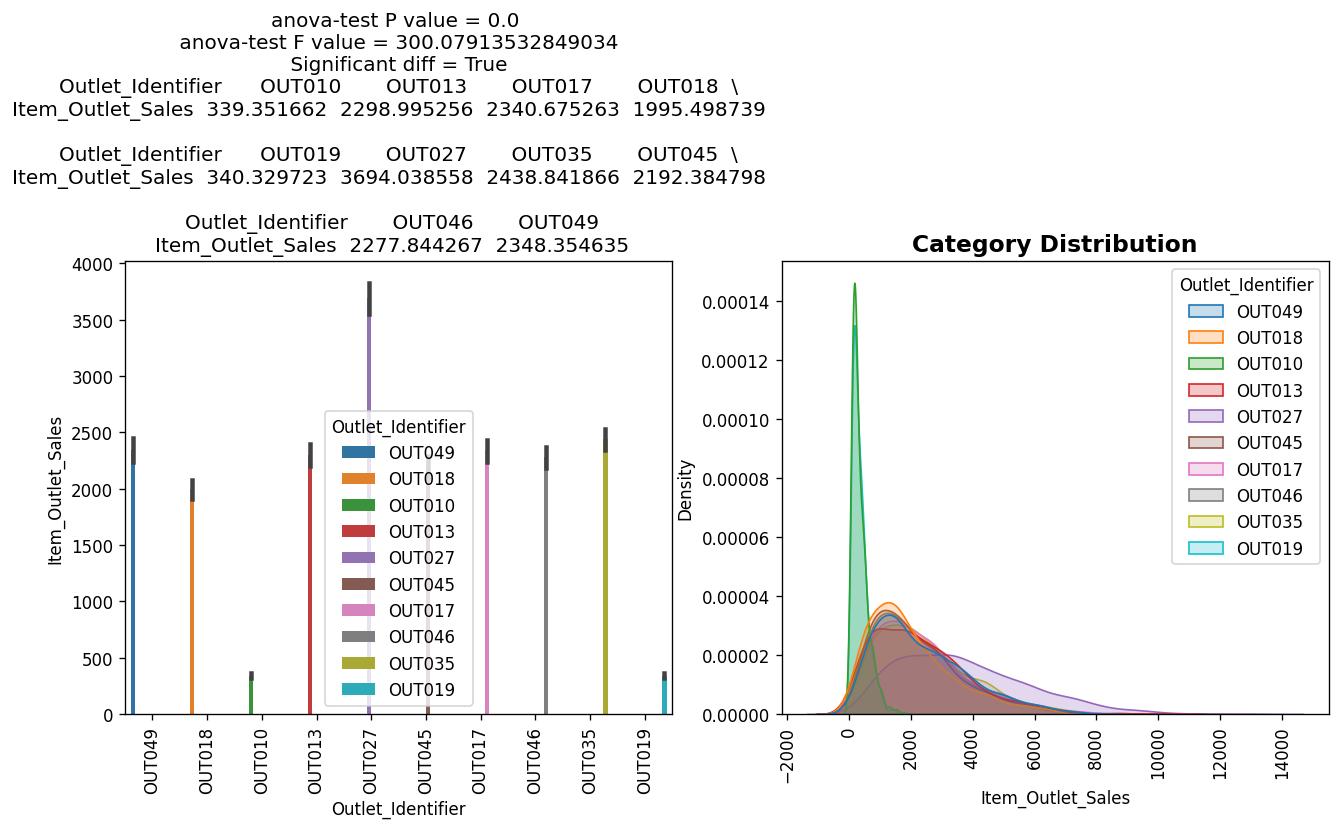

In [289]:
Bivariate_cont_cat(train_data,'Item_Outlet_Sales','Outlet_Identifier',p_value,f_value,sign_level = 0.05)

<b>Observations</b>
<li>Low fat items have relatively larger sales.</li>
<li>There is mark difference in the Item Outlet sales of different item types.</li>
<li>Dairy products have higher sales.
<li>There is mark difference between outlet size and outlet sales.
<li>Medium size stores have more outlet sales.
<li>There is mark difference between outlet location type and outlet sales.
<li>Tier 2 cities have more sales.
<li>Supermarket type 3 has more sales as compared to others.




# <center> Treating Missing Values

### train data

In [290]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [291]:
item_w = (train_data['Item_Weight'].isnull().sum()/len(train_data))*100
outlet_s = (train_data['Outlet_Size'].isnull().sum()/len(train_data))*100
print('% of missing values in Item_Weight: '+ str(item_w))
print('% of missing values in Outlet_Size: '+ str(outlet_s))
  

% of missing values in Item_Weight: 17.165317376510618
% of missing values in Outlet_Size: 28.27642848762173


In [292]:
# filling with most common class
train_data = train_data.apply(lambda x: x.fillna(x.value_counts().index[0]))
train_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [293]:
#train_data.isnull().sum()

<b>Observations</b>
<li>As miising value ratio is significant, so we can't drop the values. Filled values with frequent candidate values/class.



### test data

In [294]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [295]:
test_data = test_data.apply(lambda x: x.fillna(x.value_counts().index[0]))
test_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,10.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [296]:
#test_data.isnull().sum()

# <center> Feature Engineering

### train data

### Check inconsistent data & correct using fuzzy matching

In [297]:
train_data['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [298]:
train_data['Item_Weight'].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 , 12.15 ,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
        6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,  7.905,
        9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  , 18.25 ,
        7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 , 16.75 ,
       15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,  8.75 ,
       13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,  8.89 ,
        9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,  8.6  ,
       12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 , 12.8  ,
       16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,  7.27 ,
        6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  , 11.3  ,
        5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,  5.26 ,
      

In [299]:
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [300]:
train_data['Item_Visibility'].unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627, 0.14522065,
       0.04487828])

In [301]:
train_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [302]:
train_data['Item_MRP'].unique()

array([249.8092,  48.2692, 141.618 , ...,  57.5904, 214.5218,  75.467 ])

In [303]:
train_data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [304]:
train_data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [305]:
train_data['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [306]:
train_data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [307]:
train_data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [308]:
train_data['Item_Outlet_Sales'].unique()

array([3735.138 ,  443.4228, 2097.27  , ..., 7182.6504, 3608.636 ,
       2778.3834])

There is need to look into item_fat_content column. Low Fat, LF, low fat should be treated as same.

In [309]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].str.lower()
# remove trailing white spaces
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].str.strip()

items = train_data['Item_Fat_Content'].unique()

# sort them alphabetically and then take a closer look
items.sort()
items

array(['lf', 'low fat', 'reg', 'regular'], dtype=object)

In [310]:
import fuzzywuzzy
from fuzzywuzzy import process
#import chardet

matches = fuzzywuzzy.process.extract("low fat", items, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('low fat', 100), ('lf', 22), ('regular', 14), ('reg', 0)]

In [311]:
def replace_matches_in_column(df, column, string_to_match, min_ratio = 21):
    
    strings = df[column].unique()
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    rows_with_matches = df[column].isin(close_matches)

    df.loc[rows_with_matches, column] = string_to_match
    
    print("All done!")
    
replace_matches_in_column(df=train_data, column='Item_Fat_Content', string_to_match="low fat")

All done!


In [312]:
train_data['Item_Fat_Content'].unique()

array(['low fat', 'regular', 'reg'], dtype=object)

### test data

In [313]:
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].str.lower()
# remove trailing white spaces
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].str.strip()

items = test_data['Item_Fat_Content'].unique()

# sort them alphabetically and then take a closer look
items.sort()
items

array(['lf', 'low fat', 'reg', 'regular'], dtype=object)

In [314]:
import fuzzywuzzy
from fuzzywuzzy import process
#import chardet

matches = fuzzywuzzy.process.extract("low fat", items, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('low fat', 100), ('lf', 22), ('regular', 14), ('reg', 0)]

In [315]:
def replace_matches_in_column(df, column, string_to_match, min_ratio = 21):
    
    strings = df[column].unique()
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    rows_with_matches = df[column].isin(close_matches)

    df.loc[rows_with_matches, column] = string_to_match
    
    print("All done!")
    
replace_matches_in_column(df=test_data, column='Item_Fat_Content', string_to_match="low fat")

All done!


In [316]:
test_data['Item_Fat_Content'].unique()

array(['low fat', 'reg', 'regular'], dtype=object)

# <center> Encoding Categorical Variables

### train data

In [317]:
obj_df = train_data.select_dtypes(include=['object']).copy()
obj_df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,low fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,low fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,low fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [318]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['Item_Identifier']= le.fit_transform(train_data['Item_Identifier'])
train_data['Item_Fat_Content']=le.fit_transform(train_data['Item_Fat_Content'])
train_data['Item_Type']=le.fit_transform(train_data['Item_Type'])
train_data['Outlet_Identifier']=le.fit_transform(train_data['Outlet_Identifier'])
train_data['Outlet_Size']=le.fit_transform(train_data['Outlet_Size'])
train_data['Outlet_Location_Type']=le.fit_transform(train_data['Outlet_Location_Type'])
train_data['Outlet_Type']=le.fit_transform(train_data['Outlet_Type'])

train_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


### test data

In [319]:
obj_df = test_data.select_dtypes(include=['object']).copy()
obj_df.head(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,low fat,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1
1,FDW14,reg,Dairy,OUT017,Medium,Tier 2,Supermarket Type1
2,NCN55,low fat,Others,OUT010,Medium,Tier 3,Grocery Store
3,FDQ58,low fat,Snack Foods,OUT017,Medium,Tier 2,Supermarket Type1
4,FDY38,regular,Dairy,OUT027,Medium,Tier 3,Supermarket Type3


In [320]:
le = LabelEncoder()
test_data['Item_Identifier']= le.fit_transform(test_data['Item_Identifier'])
test_data['Item_Fat_Content']=le.fit_transform(test_data['Item_Fat_Content'])
test_data['Item_Type']=le.fit_transform(test_data['Item_Type'])
test_data['Outlet_Identifier']=le.fit_transform(test_data['Outlet_Identifier'])
test_data['Outlet_Size']=le.fit_transform(test_data['Outlet_Size'])
test_data['Outlet_Location_Type']=le.fit_transform(test_data['Outlet_Location_Type'])
test_data['Outlet_Type']=le.fit_transform(test_data['Outlet_Type'])

test_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,1,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600,0,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315,0,0.015388,13,155.0340,2,2007,1,1,1
4,1184,10.500,2,0.118599,4,234.2300,5,1985,1,2,3


# <center> Normalization

### train data

In [321]:
import scipy.stats as stats
train_data = train_data.select_dtypes(include='number').apply(stats.zscore)
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-1.388514,-0.811511,-0.732663,-0.970732,-0.766479,1.747454,1.507813,0.139541,-0.284581,-1.369334,-0.252658,0.910601
1,-1.717991,-1.609756,1.385908,-0.908111,1.608963,-1.489023,-0.607071,1.334103,-0.284581,1.091569,1.002972,-1.018440
2,-0.262057,1.125058,-0.732663,-0.956917,0.658786,0.010040,1.507813,0.139541,-0.284581,-1.369334,-0.252658,-0.049238
3,0.759769,1.526542,1.385908,-1.281758,-0.291391,0.660050,-1.664513,0.020085,-0.284581,1.091569,-1.508289,-0.849103
4,1.151580,-0.898893,-0.732663,-1.281758,0.421242,-1.399220,-1.312032,-1.293934,-1.950437,1.091569,-0.252658,-0.695373
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-0.912107,-1.386578,-0.732663,-0.181193,1.371418,1.180783,-1.312032,-1.293934,-1.950437,1.091569,-0.252658,0.349915
8519,0.261100,-1.028785,1.385908,-0.371154,-1.716656,-0.527301,0.802852,0.497909,-0.284581,-0.138882,-0.252658,-0.956402
8520,1.285152,-0.504494,-0.732663,-0.599784,0.183698,-0.897208,0.450371,0.736822,1.381274,-0.138882,-0.252658,-0.579100
8521,-0.219759,-1.305100,1.385908,1.532880,1.371418,-0.607977,-0.607071,1.334103,-0.284581,1.091569,1.002972,-0.196725


### test data

In [322]:
test_data = test_data.select_dtypes(include='number').apply(stats.zscore)
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.739896,1.949562,-0.735317,-1.134077,1.366916,-0.536555,1.507689,0.139891,-0.284737,-1.369215,-0.252769
1,0.659085,-0.929146,0.322772,-0.531850,-0.766450,-0.868937,-0.959749,1.095512,-0.284737,-0.138827,-0.252769
2,1.420050,0.527550,-0.735317,0.661316,0.892835,1.629848,-1.664731,0.020438,-0.284737,1.091560,-1.507994
3,0.079943,-1.156899,-0.735317,-0.981416,1.366916,0.226697,-0.959749,1.095512,-0.284737,-0.138827,-0.252769
4,0.921719,-0.420458,1.380862,1.032540,-0.766450,1.508110,0.097725,-1.532446,-0.284737,1.091560,2.257683
...,...,...,...,...,...,...,...,...,...,...,...
5676,-1.217514,-0.420458,1.380862,-1.018333,1.366916,0.004727,1.155198,-0.099015,1.381166,-1.369215,-0.252769
5677,-1.049159,-1.091001,1.380862,1.508493,1.840998,0.455014,-0.607258,1.334417,-0.284737,1.091560,1.002457
5678,1.433519,-0.536069,-0.735317,0.153074,0.181713,-0.360485,0.802707,0.498248,-0.284737,-0.138827,-0.252769
5679,-0.575520,0.689405,1.380862,-1.281690,-1.003490,1.190844,-0.959749,1.095512,-0.284737,-0.138827,-0.252769


# <center> Machine Learning Models

In [323]:
from sklearn import * 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score


In [339]:
X, y = train_data.iloc[:,:-1],train_data.iloc[:,-1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)

In [342]:

predictors_test = list(set(list(test_data.columns)))

X_test = test_data[predictors_test].values

print(X_test.shape)


(5681, 11)


In [249]:
model_rf = RandomForestRegressor(n_estimators=1500,min_samples_split=8, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
pred_test_rf = model_rf.predict(X_test)
print("R2 score:",r2_score(y_test, pred_test_rf)) 

R2 score: 0.5570367604194741


### Random Forest

In [352]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)







Fitting 3 folds for each of 288 candidates, totalling 864 fits
{'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 300}
0.5873559896532123


In [353]:
rf = RandomForestRegressor(n_estimators=300,bootstrap=True,min_samples_leaf=5, max_depth=110, max_features=3, min_samples_split=10)
rf.fit(X_train, y_train) 
pred_train_rf= rf.predict(X_train)


pred_val_rf = rf.predict(X_val)
print("R2 on validation:",r2_score(y_val, pred_val_rf))


pred_test_rf = rf.predict(X_test)



R2 on validation: 0.594326908440733


c:\users\health\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


### Decision Tree

In [341]:

param_grid =  {
    'min_samples_leaf': [1,2,3],
    'max_depth': [1,2,3]
}
rf1 = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=rf1,
                    param_grid=param_grid,
                    cv=10,
                    n_jobs=-1,
                    verbose=2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
{'max_depth': 3, 'min_samples_leaf': 1}
0.5213225401981971


In [347]:
rf1 = DecisionTreeRegressor(max_depth=3,min_samples_leaf=1)
rf1.fit(X_train, y_train) 
pred_train_rf1= rf1.predict(X_train)


pred_val_rf1 = rf1.predict(X_val)
print("R2 on validation:",r2_score(y_val, pred_val_rf1))


pred_test_rf1 = rf1.predict(X_test)



R2 on validation: 0.5248098240986583


c:\users\health\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


### XGBoost

In [354]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgb1 = XGBRegressor()
parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_params_)
print(xgb_grid.best_score_)


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[04:11:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[04:11:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
0.557569639615823


In [359]:
rf2 = XGBRegressor(colsample_bytree=0.7,learning_rate=0.03, max_depth=5, min_child_weight=4, n_estimators=500, nthread=4,
                           silent=1, subsample=0.7, objective='reg:linear')
rf2.fit(X_train, y_train) 
pred_train_rf2= rf2.predict(X_train)


pred_val_rf2 = rf2.predict(X_val)
print("R2 on validation:",r2_score(y_val, pred_val_rf2))


pred_test_rf2 = rf2.predict(X_test)


[04:22:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


R2 on validation: 0.5835158989351463
